In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [142]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [143]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [144]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [145]:
data.shape

(200, 4)

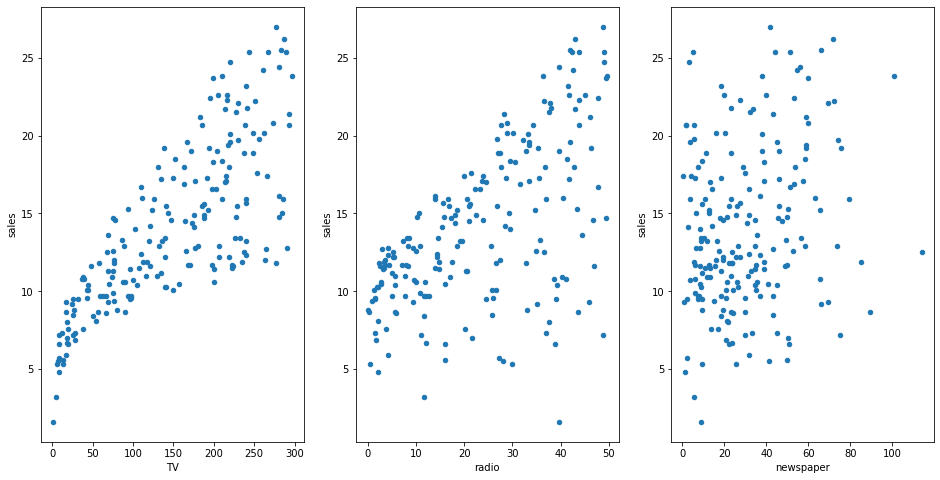

In [146]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

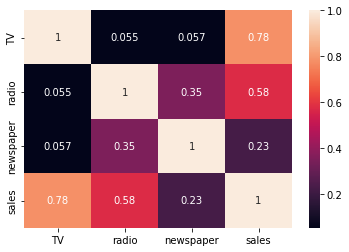

In [147]:
sns.heatmap(data.corr(), annot = True);

In [148]:
features = data[['TV', 'newspaper', 'radio']]
target = data[['sales']].values

Convert Features to Polynomial features

In [149]:
features_poly = PolynomialFeatures(degree=10)

TV_poly = features_poly.fit_transform(features[['TV']])
newspaper_poly = features_poly.fit_transform(features[['newspaper']])
radio_poly = features_poly.fit_transform(features[['radio']])

In [150]:
poly_features = pd.concat([pd.DataFrame(TV_poly),pd.DataFrame(newspaper_poly), pd.DataFrame(radio_poly)], axis = 1)

In [151]:
poly_features

,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,10
0,1.0,230.1,52946.01,1.218288e+07,2.803280e+09,6.450347e+11,1.484225e+14,3.415201e+16,7.858379e+18,1.808213e+21,...,37.8,1428.84,54010.152,2.041584e+06,7.717187e+07,2.917097e+09,1.102662e+11,4.168064e+12,1.575528e+14,5.955497e+15
1,1.0,44.5,1980.25,8.812112e+04,3.921390e+06,1.745019e+08,7.765333e+09,3.455573e+11,1.537730e+13,6.842899e+14,...,39.3,1544.49,60698.457,2.385449e+06,9.374816e+07,3.684303e+09,1.447931e+11,5.690369e+12,2.236315e+14,8.788717e+15
2,1.0,17.2,295.84,5.088448e+03,8.752131e+04,1.505366e+06,2.589230e+07,4.453476e+08,7.659979e+09,1.317516e+11,...,45.9,2106.81,96702.579,4.438648e+06,2.037340e+08,9.351389e+09,4.292287e+11,1.970160e+13,9.043034e+14,4.150753e+16
3,1.0,151.5,22952.25,3.477266e+06,5.268058e+08,7.981108e+10,1.209138e+13,1.831844e+15,2.775243e+17,4.204494e+19,...,41.3,1705.69,70444.997,2.909378e+06,1.201573e+08,4.962498e+09,2.049512e+11,8.464483e+12,3.495831e+14,1.443778e+16
4,1.0,180.8,32688.64,5.910106e+06,1.068547e+09,1.931933e+11,3.492935e+13,6.315227e+15,1.141793e+18,2.064362e+20,...,10.8,116.64,1259.712,1.360489e+04,1.469328e+05,1.586874e+06,1.713824e+07,1.850930e+08,1.999005e+09,2.158925e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,38.2,1459.24,5.574297e+04,2.129381e+06,8.134237e+07,3.107278e+09,1.186980e+11,4.534265e+12,1.732089e+14,...,3.7,13.69,50.653,1.874161e+02,6.934396e+02,2.565726e+03,9.493188e+03,3.512479e+04,1.299617e+05,4.808584e+05
196,1.0,94.2,8873.64,8.358969e+05,7.874149e+07,7.417448e+09,6.987236e+11,6.581976e+13,6.200222e+15,5.840609e+17,...,4.9,24.01,117.649,5.764801e+02,2.824752e+03,1.384129e+04,6.782231e+04,3.323293e+05,1.628414e+06,7.979227e+06
197,1.0,177.0,31329.00,5.545233e+06,9.815062e+08,1.737266e+11,3.074961e+13,5.442681e+15,9.633545e+17,1.705137e+20,...,9.3,86.49,804.357,7.480520e+03,6.956884e+04,6.469902e+05,6.017009e+06,5.595818e+07,5.204111e+08,4.839823e+09
198,1.0,283.6,80428.96,2.280965e+07,6.468818e+09,1.834557e+12,5.202803e+14,1.475515e+17,4.184560e+19,1.186741e+22,...,42.0,1764.00,74088.000,3.111696e+06,1.306912e+08,5.489032e+09,2.305393e+11,9.682652e+12,4.066714e+14,1.708020e+16


In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, target, random_state = 6)

In [154]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 33)
(50, 33)
(150, 1)
(50, 1)


In [155]:
from sklearn.linear_model import LinearRegression

##Fitting Training Dataset

In [156]:
my_model = LinearRegression()
my_model.fit(X_train, y_train)

LinearRegression()

In [157]:
my_model.coef_

array([[ 3.29937952e-16, -1.84157545e-14,  2.10332512e-19,
         7.00421575e-17,  6.34175077e-15,  4.45395705e-13,
         1.89430878e-11, -2.99834278e-13,  1.79206159e-15,
        -4.77016931e-18,  4.75800978e-21,  3.23117427e-27,
         6.80253887e-21,  3.84306642e-19,  1.77495738e-17,
         7.31876436e-16,  2.64799172e-14,  7.75067058e-13,
         1.43720324e-11, -4.58127617e-13,  4.76453741e-15,
        -1.62327544e-17,  0.00000000e+00,  2.71309842e-21,
         9.34955785e-20,  2.85426937e-18,  8.28712923e-17,
         2.26877807e-15,  5.65432033e-14,  1.18676988e-12,
         1.67557223e-11, -6.70688084e-13,  6.79059978e-15]])

In [158]:
my_model.intercept_

array([6.66591791])

##Fitting Test Dataset:

In [159]:
my_model = LinearRegression()
my_model.fit(X_test, y_test)

LinearRegression()

In [160]:
my_model.coef_

array([[-8.36854530e-11,  1.36846665e-10,  7.06264879e-14,
        -1.53752548e-13, -7.14107648e-12, -1.87733395e-10,
         2.12903184e-11, -3.01683706e-13,  1.71301454e-15,
        -4.41077706e-18,  4.29460860e-21,  1.52511425e-23,
        -3.69228768e-19, -1.80632187e-16, -8.40550249e-15,
        -2.69864127e-13, -6.38833246e-12, -9.02959580e-11,
        -2.71289589e-11,  1.05135499e-12, -1.26474263e-14,
         4.88893915e-17,  0.00000000e+00,  5.29481584e-17,
         1.58170352e-15,  3.90766114e-14,  8.58405565e-13,
         1.64521589e-11,  2.53671788e-10,  2.46340041e-09,
        -1.47514064e-10,  2.96445349e-12, -1.99272295e-14]])

In [161]:
my_model.intercept_

array([6.59955455])

In [162]:
import statsmodels.formula.api as smf

In [163]:
#my_ols_model = smf.ols(formula='sales ~ TV + radio + newspaper', data = data).fit()
my_stat_model = smf.ols(formula='sales ~ TV_poly + radio_poly + newspaper_poly', data=data).fit()
my_stat_model.pvalues

Intercept             1.261237e-27
TV_poly[0]            7.277721e-20
TV_poly[1]            2.587869e-29
TV_poly[2]            1.822598e-19
TV_poly[3]            1.276548e-21
TV_poly[4]            6.070618e-21
TV_poly[5]            1.155412e-20
TV_poly[6]            1.343443e-20
TV_poly[7]            4.589524e-18
TV_poly[8]            4.062714e-16
TV_poly[9]            1.424009e-14
TV_poly[10]           2.567908e-13
radio_poly[0]         5.722218e-27
radio_poly[1]         5.335857e-14
radio_poly[2]         4.466387e-11
radio_poly[3]         6.019198e-10
radio_poly[4]         2.288202e-09
radio_poly[5]         5.147999e-09
radio_poly[6]         8.971152e-09
radio_poly[7]         1.361130e-08
radio_poly[8]         1.902287e-08
radio_poly[9]         1.209645e-07
radio_poly[10]        5.012864e-07
newspaper_poly[0]     5.724748e-27
newspaper_poly[1]     9.085299e-04
newspaper_poly[2]     2.122769e-02
newspaper_poly[3]     4.954644e-02
newspaper_poly[4]     7.278317e-02
newspaper_poly[5]   

In [164]:
my_stat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     12.45
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.64e-17
Time:                        04:05:03   Log-Likelihood:                -558.96
No. Observations:                 200   AIC:                             1142.
Df Residuals:                     188   BIC:                             1182.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.664e-14   2.07e-15     12.881      0.000    2.26e-14    3.07e-14
TV_poly[0]         -1.486e-14   1.45e-15    -10.249      0.000   -1.77e-14    -1.2e-14
TV_poly[1]         -4.563e-18   3.39e-19    -13.445      0.000   -5.23e-18   -3.89e-18
TV_poly[2]          1.692e-18   1.67e-19     10.111      0.000    1.36e-18    2.02e-18
TV_poly[3]          1.801e-16   1.66e-17     10.854      0.000    1.47e-16    2.13e-16
TV_poly[4]            1.5e-14   1.41e-15     10.622      0.000    1.22e-14    1.78e-14
TV_poly[5]           1.01e-12   9.59e-14     10.526      0.000    8.21e-13     1.2e-12
TV_poly[6]          4.206e-11      4e-12     10.503      0.000    3.42e-11       5e-11
TV_poly[7]         -6.699e-13   6.96e-14     -9.619      0.000   -8.07e-13   -5.32e-13
TV_poly[8]          4.015e-15    4.5e-16      8.922      0.000    3.13e-15     4.9e-15
TV_poly[9]         -1.069e-17   1.28e-18     -8.354      0.000   -1.32e-17   -8.17e-18
TV_poly[10]         1.066e-20   1.35e-21      7.880      0.000    7.99e-21    1.33e-20
radio_poly[0]       2.679e-22   2.12e-23     12.661      0.000    2.26e-22     3.1e-22
radio_poly[1]       8.046e-21   9.89e-22      8.139      0.000     6.1e-21       1e-20
radio_poly[2]       2.392e-19   3.42e-20      6.997      0.000    1.72e-19    3.07e-19
radio_poly[3]           7e-18   1.07e-18      6.529      0.000    4.88e-18    9.11e-18
radio_poly[4]       1.989e-16   3.17e-17      6.280      0.000    1.36e-16    2.61e-16
radio_poly[5]       5.357e-15   8.74e-16      6.127      0.000    3.63e-15    7.08e-15
radio_poly[6]       1.316e-13   2.19e-14      6.020      0.000    8.85e-14    1.75e-13
radio_poly[7]       2.726e-12   4.59e-13      5.939      0.000    1.82e-12    3.63e-12
radio_poly[8]         3.8e-11   6.47e-12      5.874      0.000    2.52e-11    5.08e-11
radio_poly[9]      -1.576e-12   2.86e-13     -5.503      0.000   -2.14e-12   -1.01e-12
radio_poly[10]      1.645e-14   3.16e-15      5.207      0.000    1.02e-14    2.27e-14
newspaper_poly[0]   2.679e-22   2.12e-23     12.661      0.000    2.26e-22     3.1e-22
newspaper_poly[1]   8.361e-21   2.48e-21      3.371      0.001    3.47e-21    1.33e-20
newspaper_poly[2]   3.302e-19   1.42e-19      2.323      0.021    4.98e-20    6.11e-19
newspaper_poly[3]   1.387e-17   7.02e-18      1.977      0.050    2.78e-20    2.77e-17
newspaper_poly[4]   5.701e-16   3.16e-16      1.804      0.073   -5.32e-17    1.19e-15
newspaper_poly[5]   2.148e-14   1.26e-14      1.703      0.090    -3.4e-15    4.64e-14
newspaper_poly[6]   6.723e-13    4.1e-13      1.640      0.103   -1.37e-13    1.48e-12
newspaper_poly[7]   1.357e-11   8.48e-12      1.601      0.111   -3.15e-12    3.03e-11
newspaper_poly[8]   -4.12e-13   2.78e-13     -1.481      0.140   -9.61e-13    1.37e-13
newspaper_poly[9]   4.089e-15      3e-

#### Prediction and Evaluation on Train Data

In [165]:
preds_train = my_model.predict(X_train)
print('MAE : ', mean_absolute_error(y_train, preds_train))
print('MSE : ', mean_squared_error(y_train, preds_train))
print('R2 Score : ', my_model.score(X_train, y_train))

MAE :  2.0640062483109753
MSE :  20.869095545038228
R2 Score :  0.2781406745717281


#### Prediction and Evaluation on Test Data

In [166]:
preds = my_model.predict(X_test)
print('MAE : ', mean_absolute_error(y_test, preds))
print('MSE : ', mean_squared_error(y_test, preds))
print('R2 score : ', my_model.score(X_test, y_test)) 

MAE :  1.4467733129715226
MSE :  3.344284228035241
R2 score :  0.845164256019365


In [167]:
m=100
X= 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

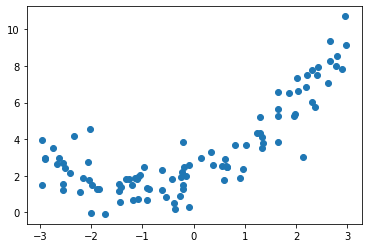

In [168]:
plt.scatter(X,y)

In [169]:
def learning_curves(model, X,y):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)
    train_errors, test_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-+", label = 'train')
    plt.plot(np.sqrt(test_errors), "b-", label = 'test')
    plt.xlabel('Number of instances')
    plt.ylabel('Error')
    

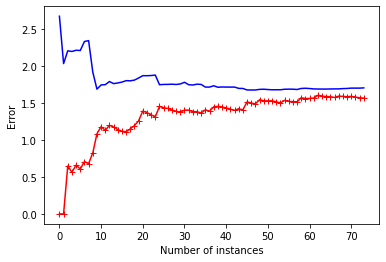

In [170]:
my_lin_reg = LinearRegression()
learning_curves(my_lin_reg, X, y)

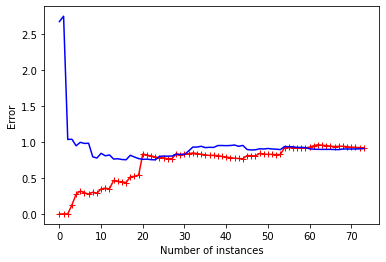

In [171]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=2)),
                     ('lin_reg', LinearRegression()),
                     ])

learning_curves(polynomial_regression, X, y)

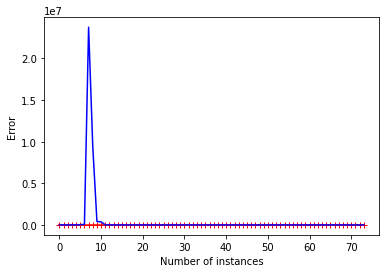

In [172]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10)),
                     ('lin_reg', LinearRegression()),
                     ])

learning_curves(polynomial_regression, X, y)

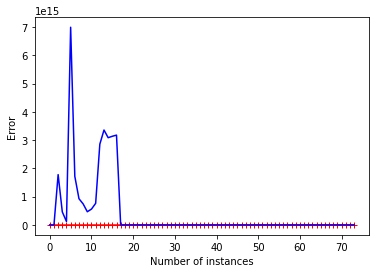

In [173]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=50)),
                     ('lin_reg', LinearRegression()),
                     ])

learning_curves(polynomial_regression, X, y)